In [13]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
lya = 1215.67

In [41]:
# main folder where the processed files are
nside = 16
#basedir = '/Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside{}_N1000'.format(nside)
#basedir = '../example_data/update_230518'
basedir = '/Users/jfarr/Projects/test_data/test_Pk_corr/'

In [42]:
pix = 1
pix_100 = int(pix/100)
dirname = basedir+'/'+str(pix_100)+'/'+str(pix)+'/'
suffix = str(nside)+'-'+str(pix)+'.fits'
print('dir name',dirname)

dir name /Users/jfarr/Projects/test_data/test_Pk_corr//0/1/


In [43]:
# find QSO with highest z
gauss_dens_file = dirname+'/gaussian-colore-'+suffix
gauss_dens_hdu = fits.open(gauss_dens_file)
iskewer = np.argmax(gauss_dens_hdu[1].data['Z_COSMO'])
#iskewer=1

In [44]:
# Gaussian colore
gauss_dens_file = dirname+'/gaussian-colore-'+suffix
print('gaussian density file\n',gauss_dens_file)
gauss_dens_hdu = fits.open(gauss_dens_file)
gauss_dens_hdu.info()
zq = gauss_dens_hdu[1].data['Z_COSMO']
gauss_dens = gauss_dens_hdu[2].data
gauss_dens_zs = gauss_dens_hdu[4].data['Z']

MOCKID = gauss_dens_hdu[1].data['MOCKID'][iskewer]
print('\nlooking at skewer with MOCKID',MOCKID)

gauss_dens_hdu.close()

gaussian density file
 /Users/jfarr/Projects/test_data/test_Pk_corr//0/1//gaussian-colore-16-1.fits
Filename: /Users/jfarr/Projects/test_data/test_Pk_corr//0/1//gaussian-colore-16-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     26   7R x 6C   [D, D, D, D, D, K]   
  2  GAUSSIAN_DELTA    1 ImageHDU        13   (2048, 7)   float32   
  3  VELOCITY      1 ImageHDU        13   (2048, 7)   float32   
  4  COSMO         1 BinTableHDU     22   2048R x 4C   [D, D, D, D]   

looking at skewer with MOCKID 268


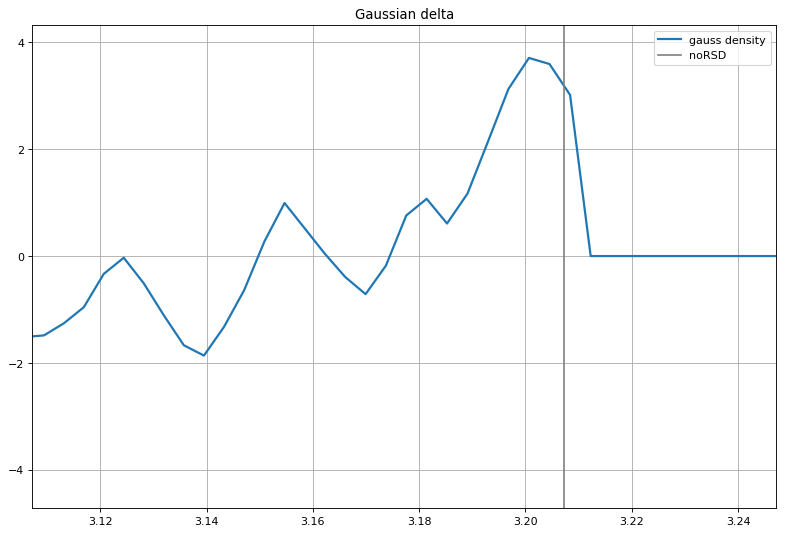

In [45]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gauss density')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5),label='noRSD')
plt.xlim(zq[iskewer]-0.1,zq[iskewer]+0.04)
plt.title('Gaussian delta')
plt.legend()
plt.grid()
plt.show()

In [46]:
# physical colore
phys_dens_file = dirname+'/physical-colore-'+suffix
print('physical density file\n',phys_dens_file)
phys_dens_hdu = fits.open(phys_dens_file)
phys_dens_hdu.info()
phys_dens = phys_dens_hdu[2].data
phys_dens_zs = phys_dens_hdu[4].data['Z']
phys_dens_hdu.close()

physical density file
 /Users/jfarr/Projects/test_data/test_Pk_corr//0/1//physical-colore-16-1.fits
Filename: /Users/jfarr/Projects/test_data/test_Pk_corr//0/1//physical-colore-16-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     26   7R x 6C   [D, D, D, D, D, K]   
  2  PHYSICAL_DELTA    1 ImageHDU        13   (2048, 7)   float32   
  3  VELOCITY      1 ImageHDU        13   (2048, 7)   float32   
  4  COSMO         1 BinTableHDU     22   2048R x 4C   [D, D, D, D]   


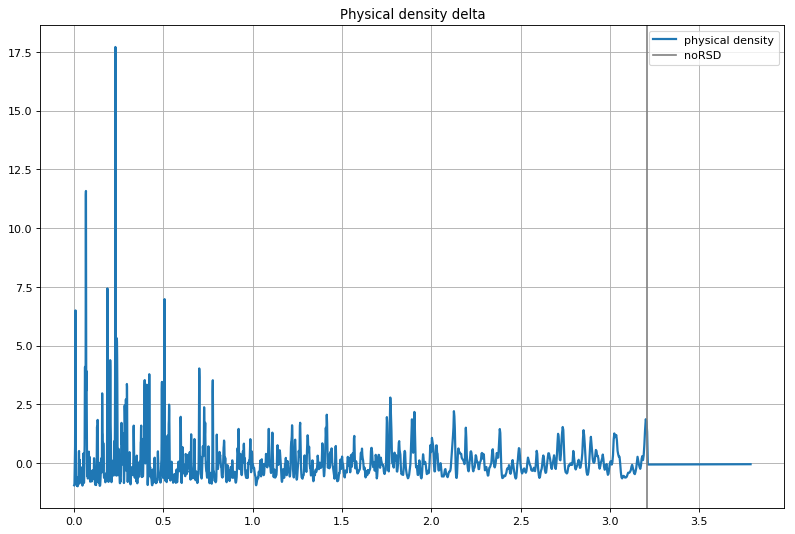

In [47]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(phys_dens_zs,phys_dens[iskewer],lw=2,label='physical density')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5),label='noRSD')
plt.title('Physical density delta')
plt.legend()
plt.grid()
plt.show()

In [48]:
# transmission
transmission_file = dirname+'/transmission-'+suffix
print('physical density file',transmission_file)
transmission_hdu = fits.open(transmission_file)
transmission_hdu.info()
zq = transmission_hdu[1].data['Z']
zq_noRSD = transmission_hdu[1].data['Z_noRSD']
transmission = transmission_hdu[3].data
transmission_zs = transmission_hdu[2].data/lya - 1
DLA = transmission_hdu['DLA'].data
transmission_hdu.close()

physical density file /Users/jfarr/Projects/test_data/test_Pk_corr//0/1//transmission-16-1.fits
Filename: /Users/jfarr/Projects/test_data/test_Pk_corr//0/1//transmission-16-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  METADATA      1 BinTableHDU     23   7R x 5C   [D, D, D, D, K]   
  2  WAVELENGTH    1 ImageHDU        11   (5361,)   float64   
  3  TRANSMISSION    1 ImageHDU        12   (5361, 7)   float64   
  4  DLA           1 BinTableHDU     21   2R x 4C   [K, D, D, D]   


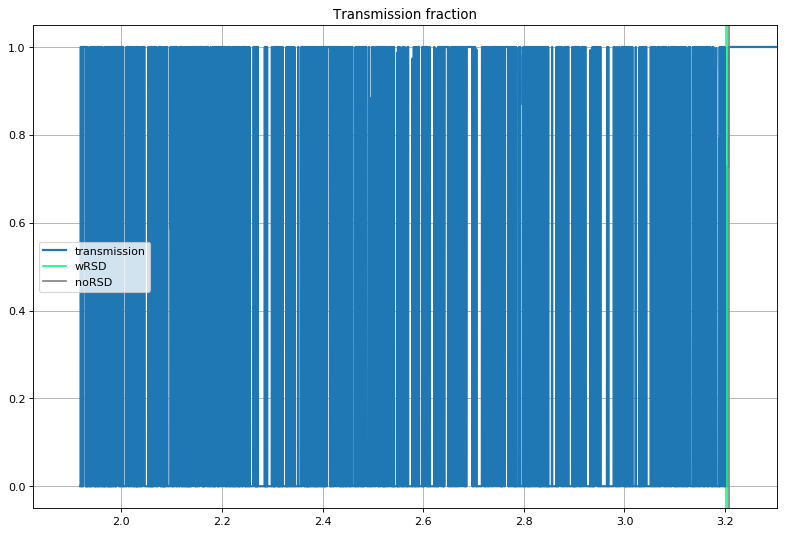

In [49]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
#THIS WILL CHANGE FOR FUTURE VERSIONS ONCE TRANSMISSION FILES BECOME N_QSO,N_CELLS IN SHAPE
plt.plot(transmission_zs,transmission[iskewer,:],lw=2,label='transmission')

plt.axvline(x=zq[iskewer],c=(0.0,1.0,0.5),label='wRSD')
plt.axvline(x=zq_noRSD[iskewer],c=(0.5,0.5,0.5),label='noRSD')

plt.xlim(xmax=zq[iskewer]+0.1)
plt.title('Transmission fraction')
plt.legend()
plt.grid()
plt.show()

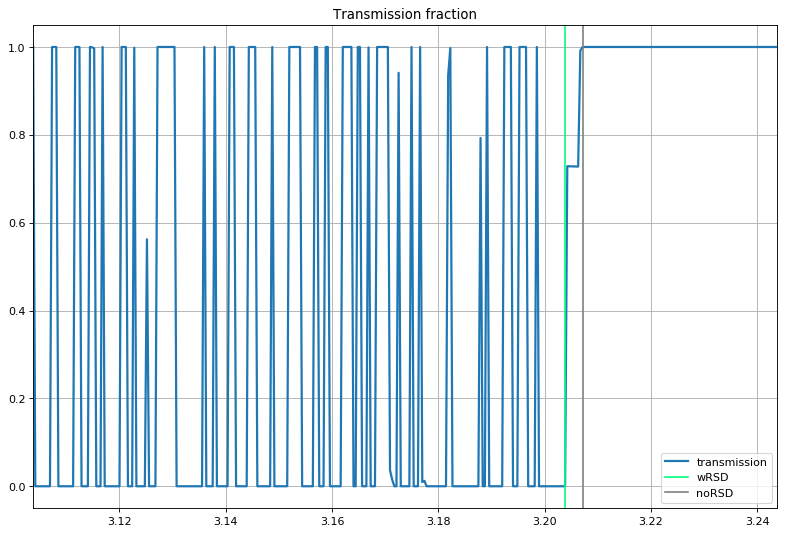

In [50]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
#THIS WILL CHANGE FOR FUTURE VERSIONS ONCE TRANSMISSION FILES BECOME N_QSO,N_CELLS IN SHAPE
plt.plot(transmission_zs,transmission[iskewer,:],lw=2,label='transmission')

plt.axvline(x=zq[iskewer],c=(0.0,1.0,0.5),label='wRSD')
plt.axvline(x=zq_noRSD[iskewer],c=(0.5,0.5,0.5),label='noRSD')

#gauss_dens_zs

plt.xlim(zq[iskewer]-0.1,zq[iskewer]+0.04)
plt.title('Transmission fraction')
plt.legend()
plt.grid()
plt.show()

In [51]:
print(DLA)

[(210,  2.33097246,  0.00073398,  19.6010101 )
 (210,  2.84093232, -0.00093115,  19.75252525)]


In [25]:
# picca gaussian
picca_gauss_file = dirname+'/picca-gaussian-'+suffix
print('picca gaussian file\n',picca_gauss_file)
picca_gauss_hdu = fits.open(picca_gauss_file)
picca_gauss_hdu.info()
zq_noRSD = picca_gauss_hdu[3].data['Z']
picca_gauss_delta = picca_gauss_hdu[0].data
picca_ivar = picca_gauss_hdu[1].data
picca_gauss_ll = picca_gauss_hdu[2].data

iskewer_picca = np.where(picca_gauss_hdu[3].data['THING_ID']==MOCKID)

if iskewer_picca[0].shape[0] == 0:
    print('\nskewer with MOCKID {} is not in the picca files.'.format(MOCKID))
    print('using skewer with maximum redshift instead')
    zq_noRSD = picca_gauss_hdu[3].data['Z']
    #zq = zq_noRSD + picca_gauss_hdu[3].data['DZ_RSD']
    iskewer_picca = np.argmax(zq)
else:
    iskewer_picca = iskewer_picca[0][0]
    
picca_gauss_hdu.close()
lya=1215.67
picca_zs = (10**picca_gauss_ll)/lya - 1.0
sigma_G = np.std(picca_gauss_delta[:np.argmax(picca_ivar[:,iskewer_picca]==0),iskewer_picca])

picca gaussian file
 /Users/jfarr/Projects/test_data/test_wn//0/1//picca-gaussian-16-1.fits
Filename: /Users/jfarr/Projects/test_data/test_wn//0/1//picca-gaussian-16-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  METADATA      1 PrimaryHDU      11   (5, 5361)   float32   
  1  IV            1 ImageHDU        12   (5, 5361)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5361,)   float64   
  3  CATALOG       1 BinTableHDU     27   5R x 7C   [D, D, D, K, D, K, K]   


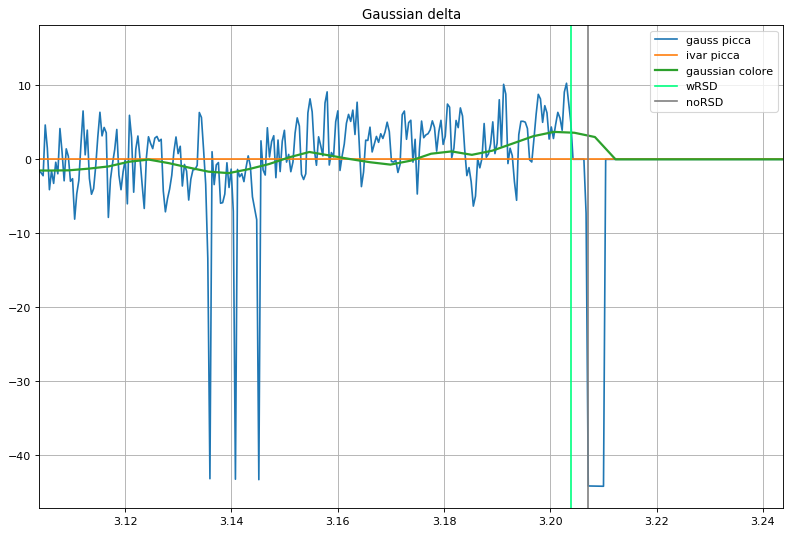

In [26]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_gauss_delta[:,iskewer_picca],label='gauss picca')
plt.plot(picca_zs,sigma_G*picca_ivar[:,iskewer_picca],label='ivar picca')
plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gaussian colore')
plt.xlim(np.min(picca_zs)-0.1,np.max(picca_zs))

plt.xlim(zq[iskewer]-0.1,zq[iskewer]+0.04)

plt.axvline(x=zq[iskewer],c=(0.0,1.0,0.5),label='wRSD')
plt.axvline(x=zq_noRSD[iskewer_picca],c=(0.5,0.5,0.5),label='noRSD')

plt.title('Gaussian delta')
plt.legend()
plt.grid()
plt.show()

In [27]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_gauss_delta[:,iskewer],label='gauss picca')
plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gaussian colore')
plt.xlim(np.min(picca_zs)+0.5,np.min(picca_zs)+0.7)
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.title('Gaussian delta (compare colore vs colore + extra small scale fluctuations)')
plt.legend()
plt.grid()
plt.show()

IndexError: index 6 is out of bounds for axis 1 with size 5

In [28]:
# picca density
picca_dens_file = dirname+'/picca-density-'+suffix
print('picca density file\n',picca_dens_file)
picca_dens_hdu = fits.open(picca_dens_file)
picca_dens_hdu.info()
picca_dens_delta = picca_dens_hdu[0].data
picca_dens_hdu.close()
sigma_D = np.std(picca_dens_delta[:np.argmax(picca_ivar[:,iskewer]==0),iskewer])

picca density file
 /Users/jfarr/Projects/test_data/test_wn//0/1//picca-density-16-1.fits
Filename: /Users/jfarr/Projects/test_data/test_wn//0/1//picca-density-16-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CATALOG       1 PrimaryHDU      11   (5, 5361)   float64   
  1  IV            1 ImageHDU        12   (5, 5361)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5361,)   float64   
  3  CATALOG       1 BinTableHDU     27   5R x 7C   [D, D, D, K, D, K, K]   


IndexError: index 6 is out of bounds for axis 1 with size 5

In [29]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_dens_delta[:,iskewer_picca],label='dens picca')
plt.plot(picca_zs,sigma_D*picca_ivar[:,iskewer],label='ivar picca')
plt.plot(phys_dens_zs,phys_dens[iskewer],lw=2,label='physical colore')

plt.axvline(x=zq[iskewer],c=(0.0,1.0,0.5),label='wRSD')
plt.axvline(x=zq_noRSD[iskewer_picca],c=(0.5,0.5,0.5),label='noRSD')

plt.xlim(np.min(picca_zs)-0.1,np.max(picca_zs))

plt.xlim(zq[iskewer]-0.1,zq[iskewer]+0.04)
plt.ylim(-2,12)
plt.title('Physical density delta')
plt.legend()
plt.grid()
plt.show()

NameError: name 'sigma_D' is not defined

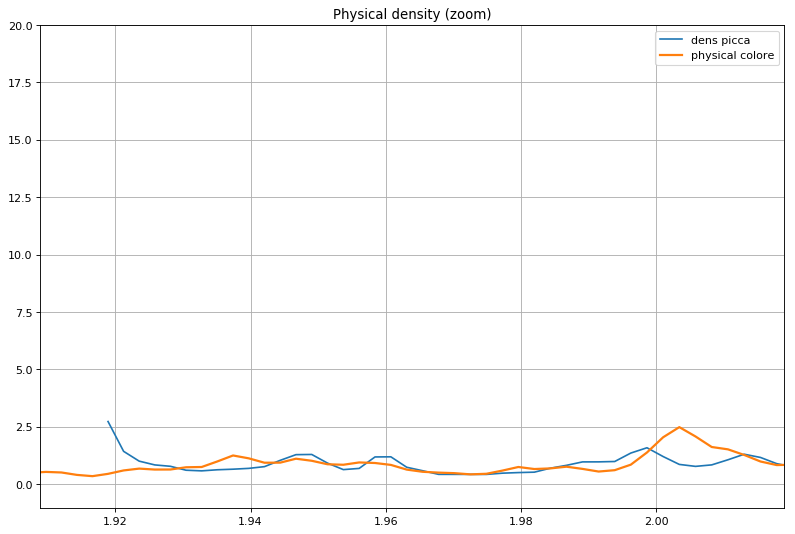

In [18]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_dens_delta[:,iskewer]+1,label='dens picca')
plt.plot(phys_dens_zs,phys_dens[iskewer]+1,lw=2,label='physical colore')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.xlim(np.min(picca_zs)-0.01,np.min(picca_zs)+0.1)
plt.ylim(ymax=20)
plt.title('Physical density (zoom)')
#plt.semilogy()
plt.legend()
plt.grid()
plt.show()

In [19]:
# picca flux
picca_flux_file = dirname+'/picca-flux-'+suffix
print('picca flux file\n',picca_flux_file)
picca_flux_hdu = fits.open(picca_flux_file)
picca_flux_hdu.info()
picca_flux_delta = picca_flux_hdu[0].data
picca_flux_hdu.close()

picca flux file
 /Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside16/0/1//picca-flux-16-1.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside16/0/1//picca-flux-16-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CATALOG       1 PrimaryHDU      12   (1642, 568)   float64   
  1  IV            1 ImageHDU        13   (1642, 568)   float32   
  2  LOGLAM_MAP    1 ImageHDU        12   (568,)   float32   
  3  CATALOG       1 BinTableHDU     28   1642R x 7C   [E, E, E, K, E, K, K]   


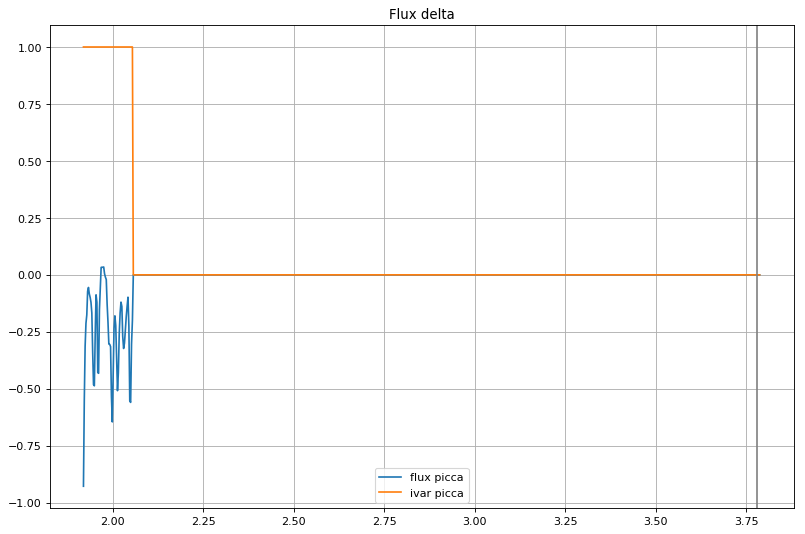

In [20]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_flux_delta[:,iskewer],label='flux picca')
plt.plot(picca_zs,picca_ivar[:,iskewer],label='ivar picca')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.xlim(xmax=zq[iskewer]+0.1)
plt.title('Flux delta')
plt.legend()
plt.grid()
plt.show()